# Parameters

In [1]:
datasets = ['codex-m', 'fb15k-237', 'wnrr', 'wn18', 'yago3-10']
symbolic_models = [('anyburl', 'AnyBURL')]
subsymbolic_models = [('complex', 'ComplEx'), ('rescal', 'RESCAL'), ('conve', 'ConvE')]

use_difference_psi = True
bp_threshold = 20

# Imports

In [2]:
%run utils.ipynb
%run graphs.ipynb
%run format_predictions.ipynb

from matplotlib.backends.backend_pdf import PdfPages
import os
import pandas as pd

C:\Users\larsj\anaconda3\envs\thesis\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Analysis

Working on codex-m - AnyBURL - ComplEx
using precalculated values from temp\_get_entity_frequency_in_training_data-codex-m.txt
using precalculated values from temp\_get_entity_frequency_in_training_data-codex-m.txt


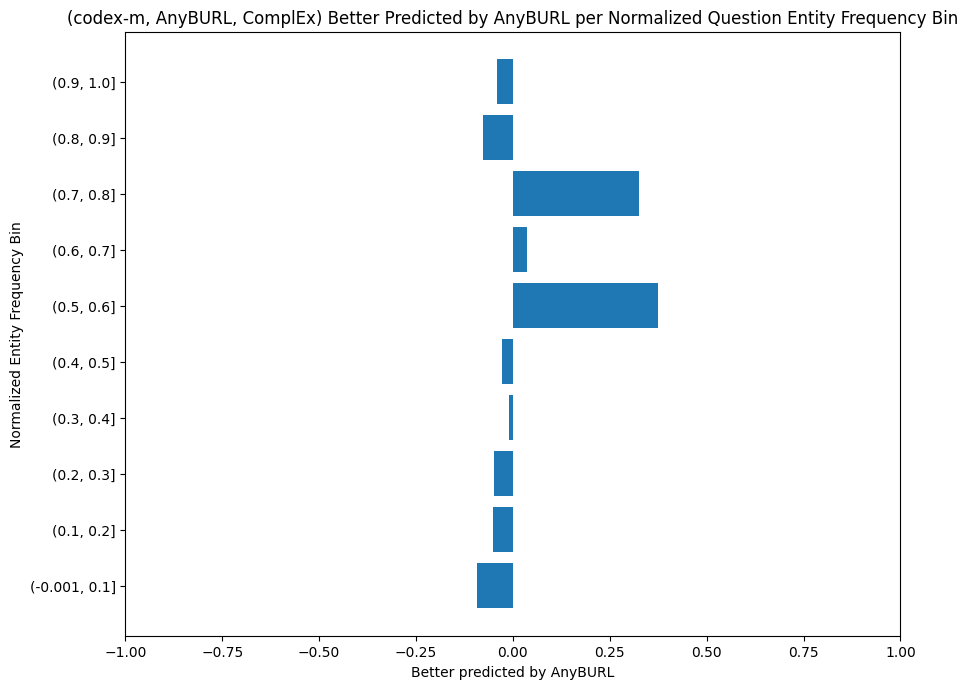

using precalculated values from temp\_get_entity_frequency_in_training_data-codex-m.txt
using precalculated values from temp\_get_entity_frequency_in_training_data-codex-m.txt


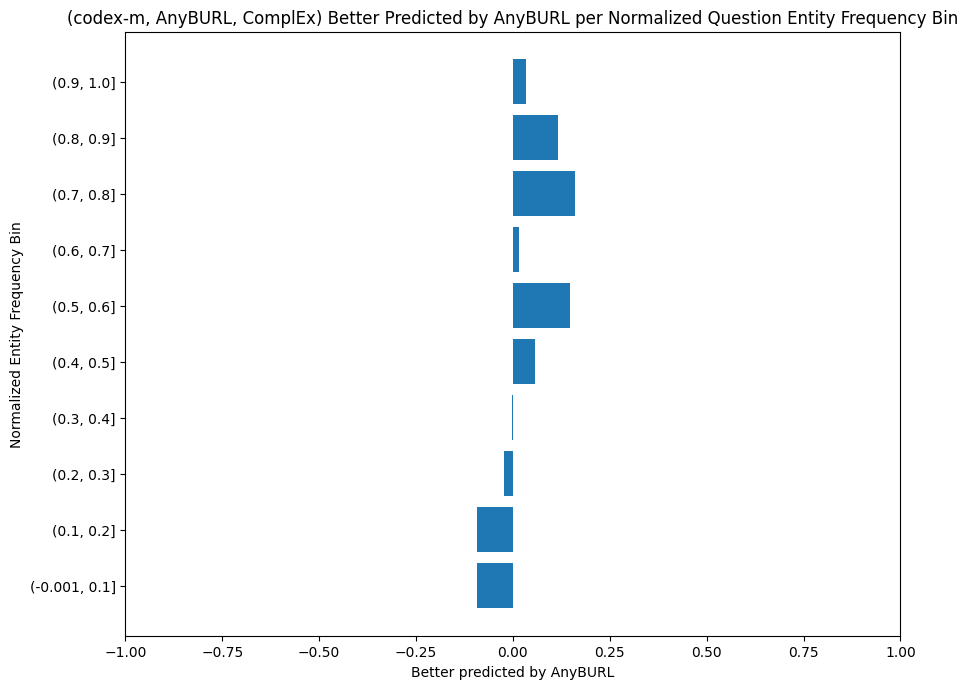

Working on codex-m - AnyBURL - RESCAL
using precalculated values from temp\_get_entity_frequency_in_training_data-codex-m.txt
using precalculated values from temp\_get_entity_frequency_in_training_data-codex-m.txt


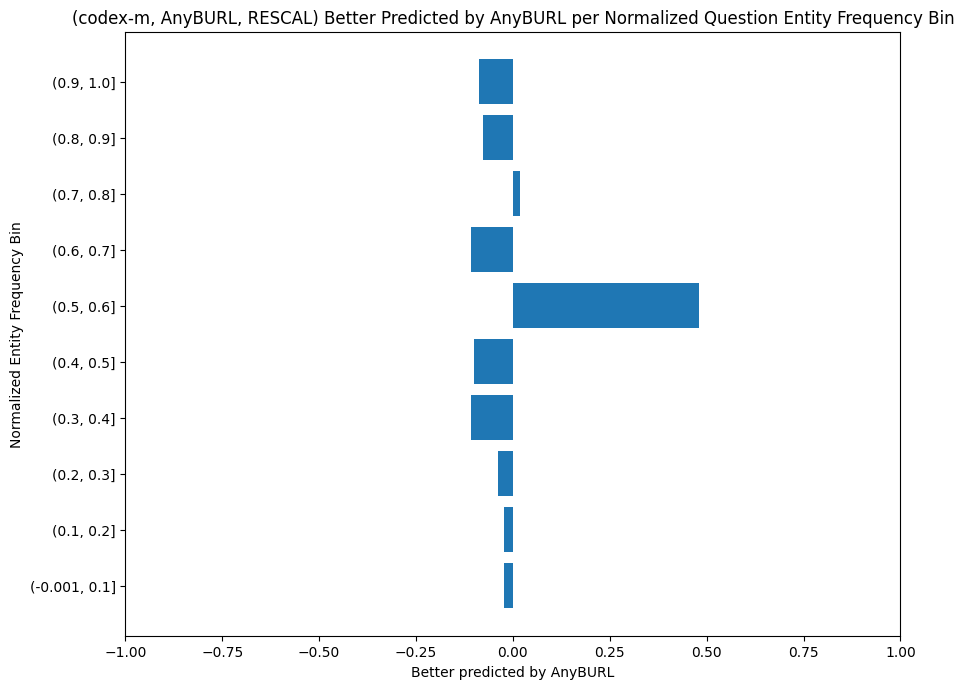

using precalculated values from temp\_get_entity_frequency_in_training_data-codex-m.txt
using precalculated values from temp\_get_entity_frequency_in_training_data-codex-m.txt


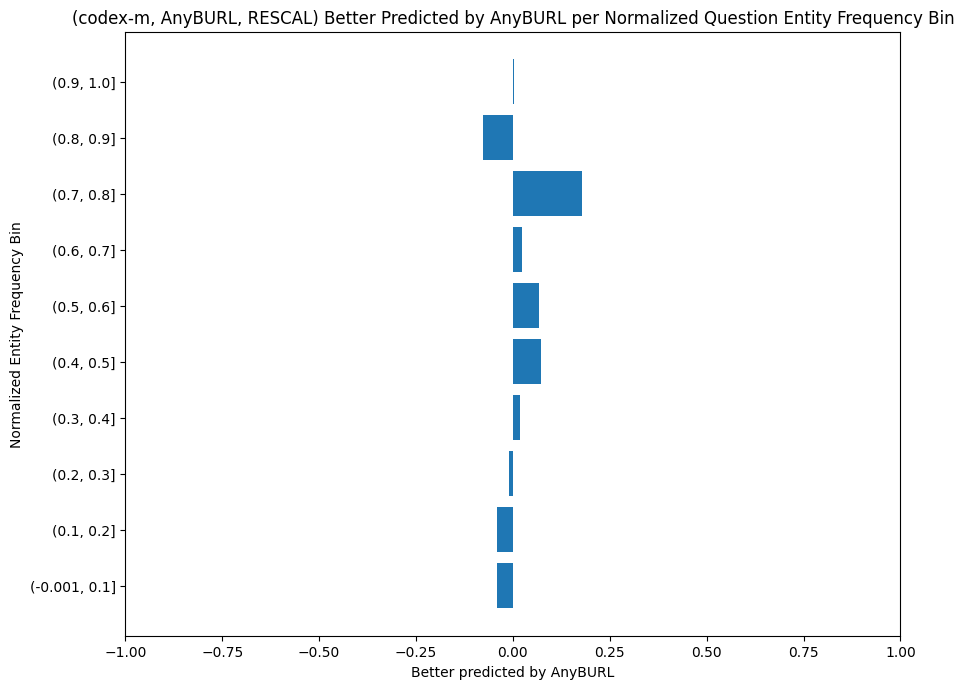

Working on codex-m - AnyBURL - ConvE
using precalculated values from temp\_get_entity_frequency_in_training_data-codex-m.txt
using precalculated values from temp\_get_entity_frequency_in_training_data-codex-m.txt


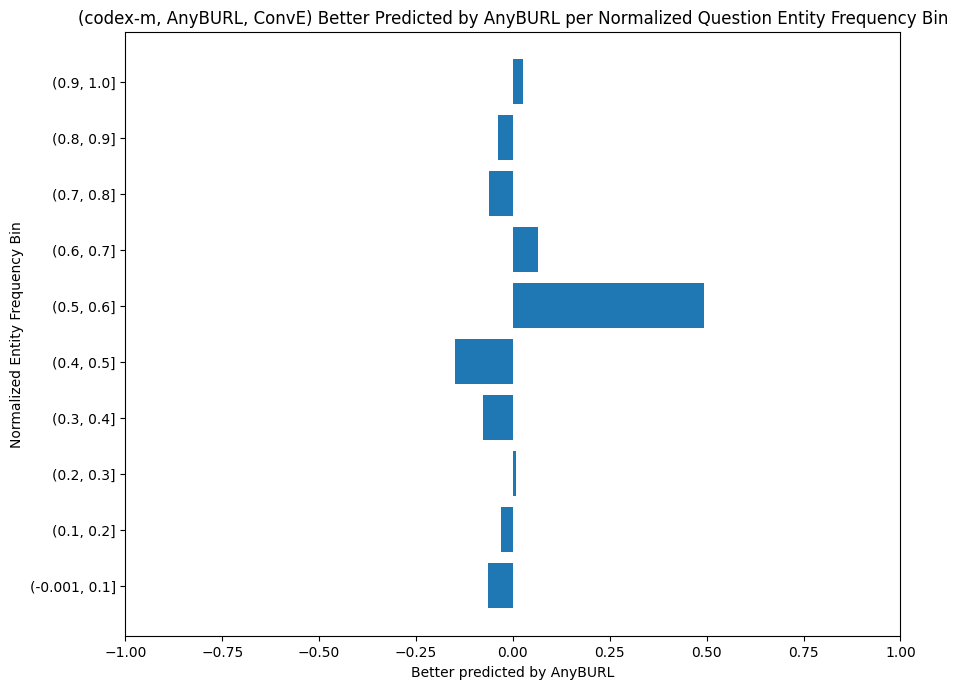

using precalculated values from temp\_get_entity_frequency_in_training_data-codex-m.txt
using precalculated values from temp\_get_entity_frequency_in_training_data-codex-m.txt


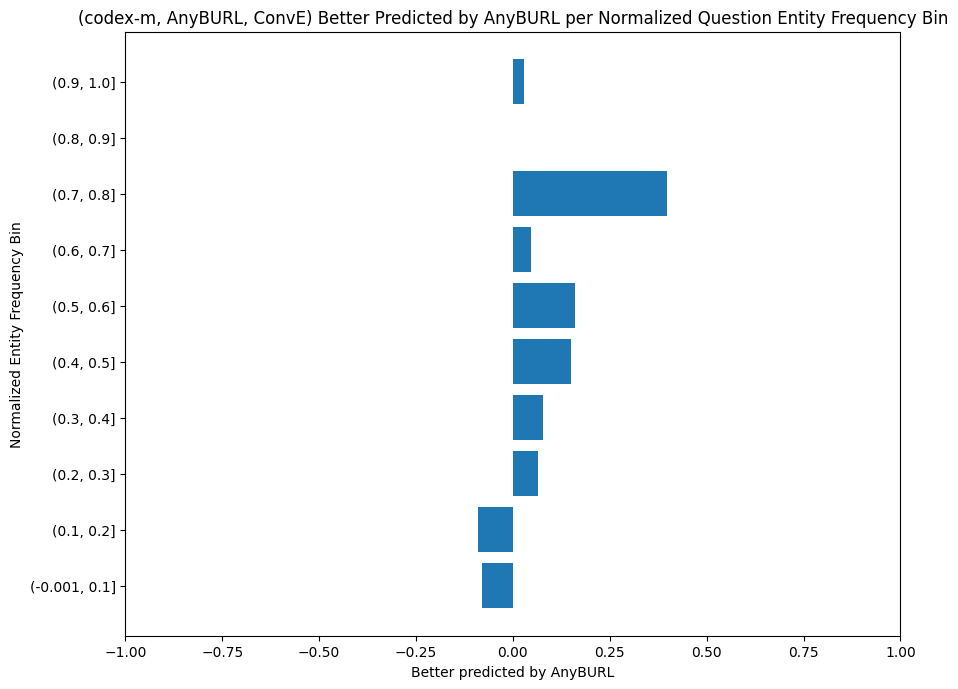

Working on fb15k-237 - AnyBURL - ComplEx
using precalculated values from temp\_get_entity_frequency_in_training_data-fb15k-237.txt
using precalculated values from temp\_get_entity_frequency_in_training_data-fb15k-237.txt


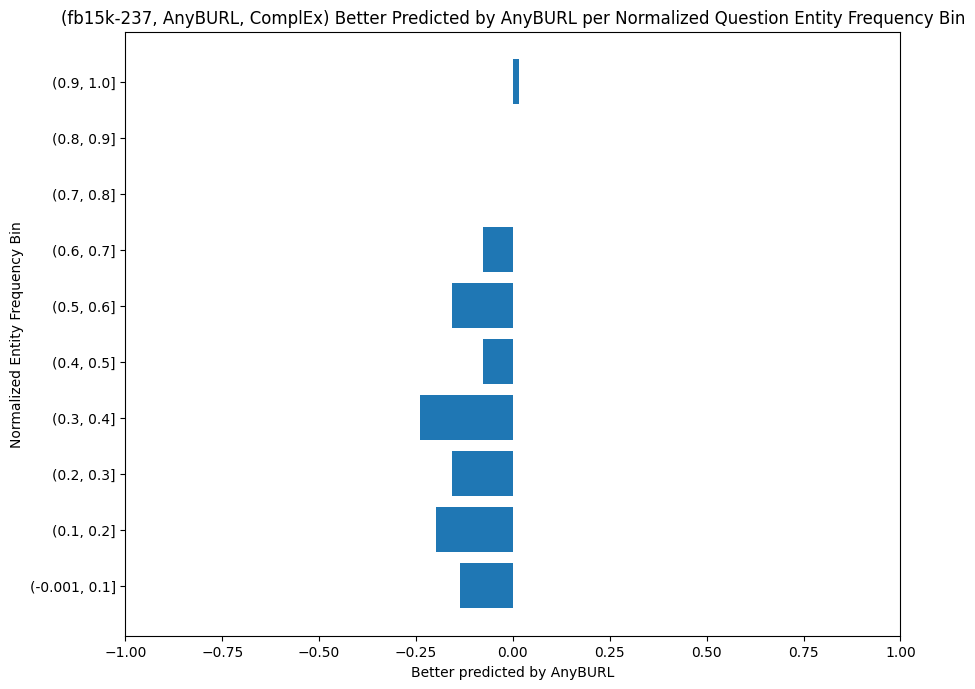

using precalculated values from temp\_get_entity_frequency_in_training_data-fb15k-237.txt
using precalculated values from temp\_get_entity_frequency_in_training_data-fb15k-237.txt


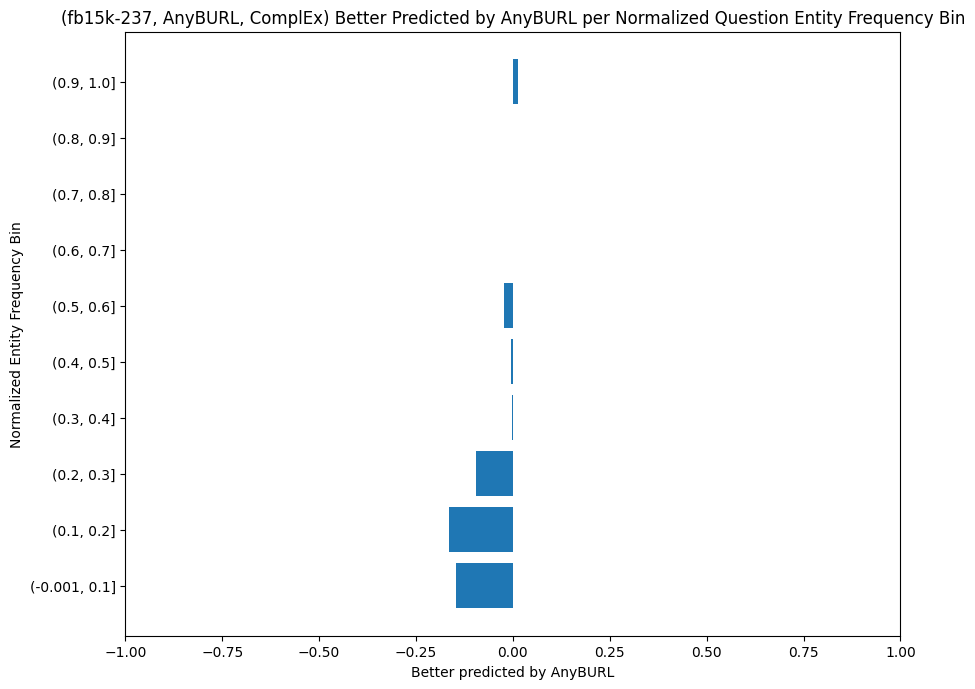

Working on fb15k-237 - AnyBURL - RESCAL
using precalculated values from temp\_get_entity_frequency_in_training_data-fb15k-237.txt
using precalculated values from temp\_get_entity_frequency_in_training_data-fb15k-237.txt


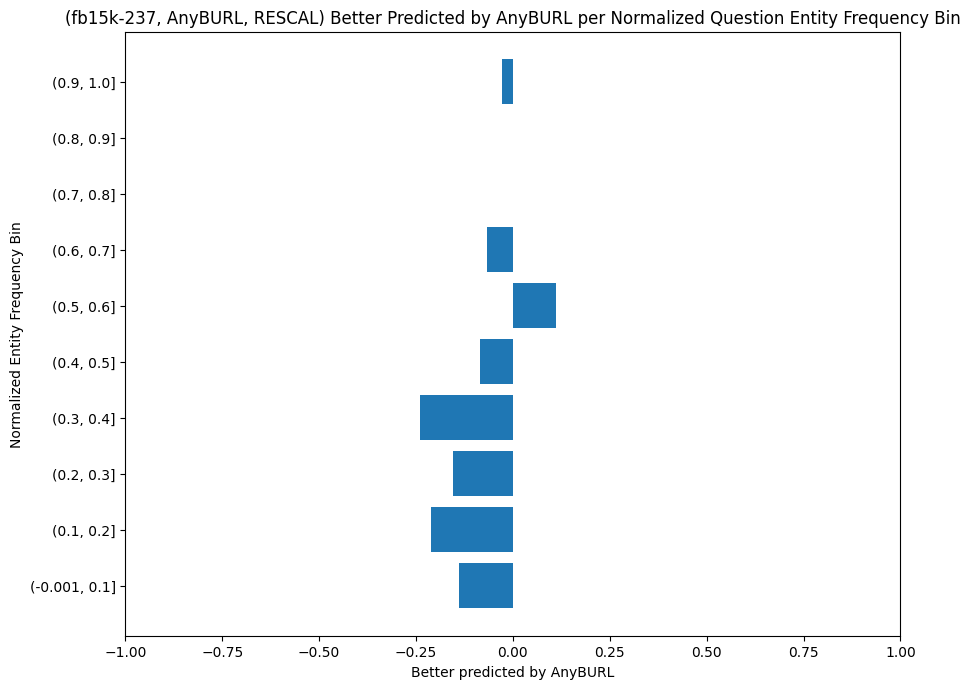

using precalculated values from temp\_get_entity_frequency_in_training_data-fb15k-237.txt
using precalculated values from temp\_get_entity_frequency_in_training_data-fb15k-237.txt


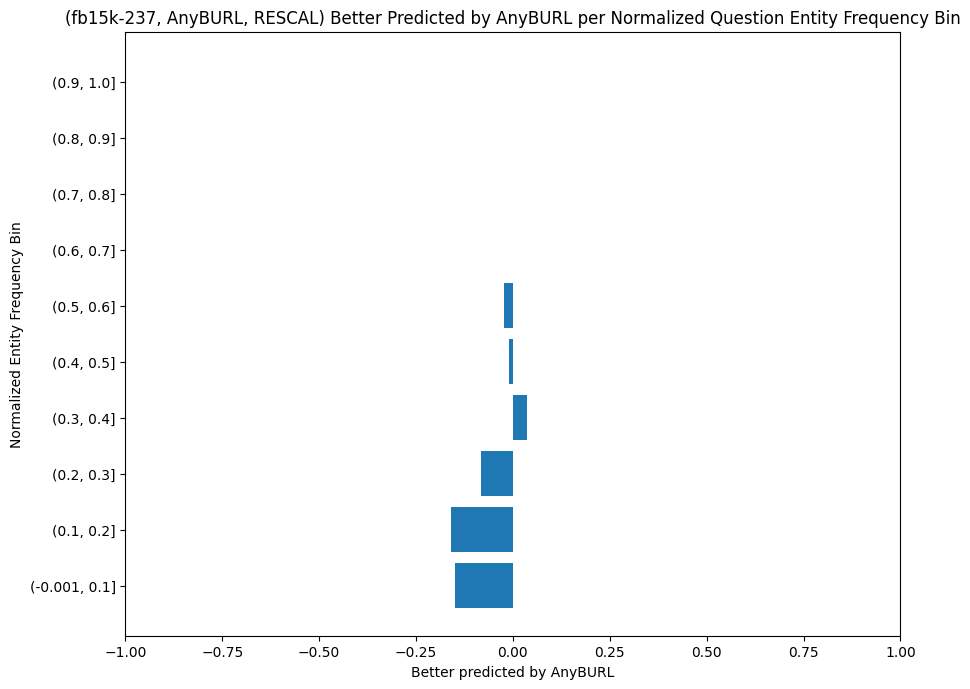

Working on fb15k-237 - AnyBURL - ConvE
using precalculated values from temp\_get_entity_frequency_in_training_data-fb15k-237.txt
using precalculated values from temp\_get_entity_frequency_in_training_data-fb15k-237.txt


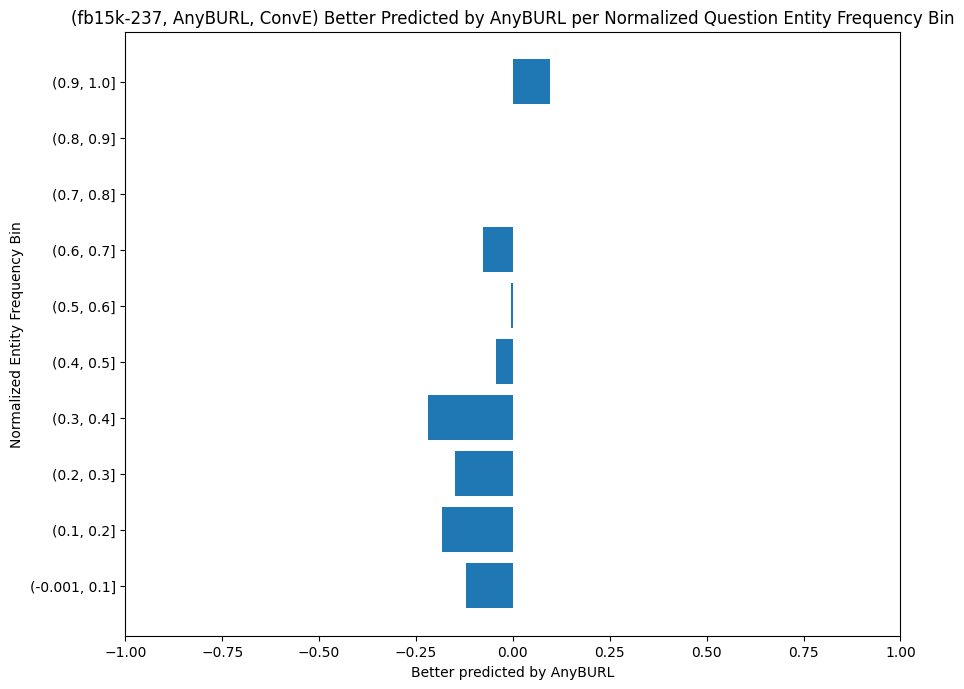

using precalculated values from temp\_get_entity_frequency_in_training_data-fb15k-237.txt
using precalculated values from temp\_get_entity_frequency_in_training_data-fb15k-237.txt


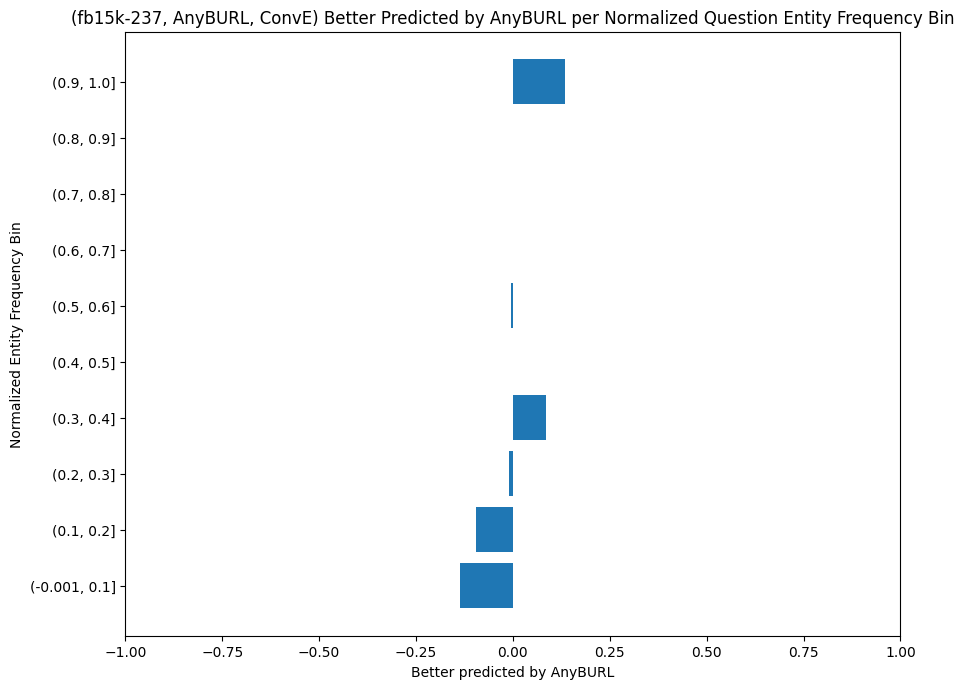

Working on wnrr - AnyBURL - ComplEx
using precalculated values from temp\_get_entity_frequency_in_training_data-wnrr.txt
using precalculated values from temp\_get_entity_frequency_in_training_data-wnrr.txt


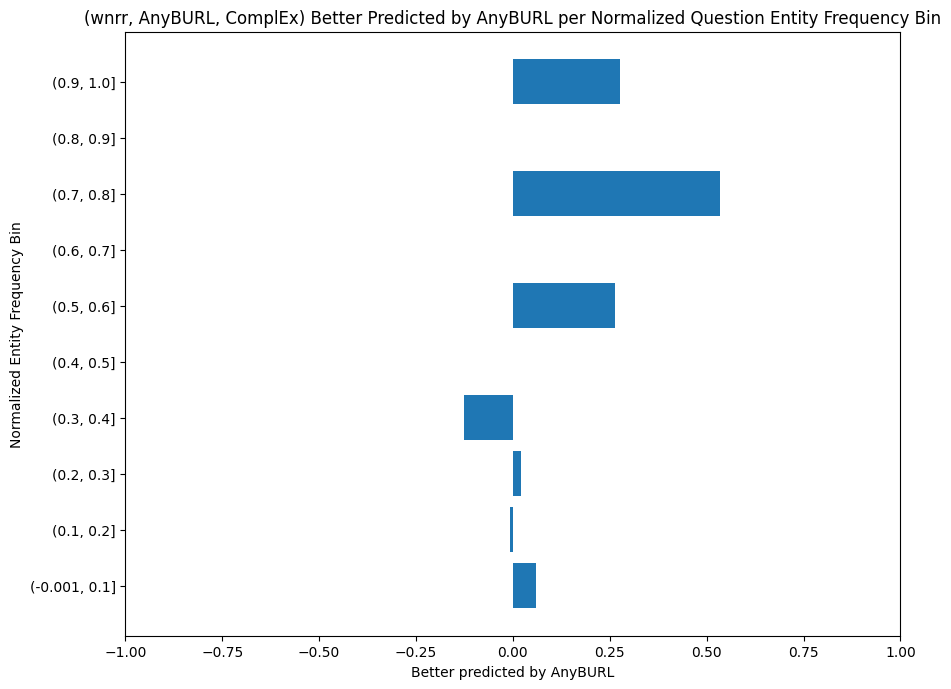

using precalculated values from temp\_get_entity_frequency_in_training_data-wnrr.txt
using precalculated values from temp\_get_entity_frequency_in_training_data-wnrr.txt


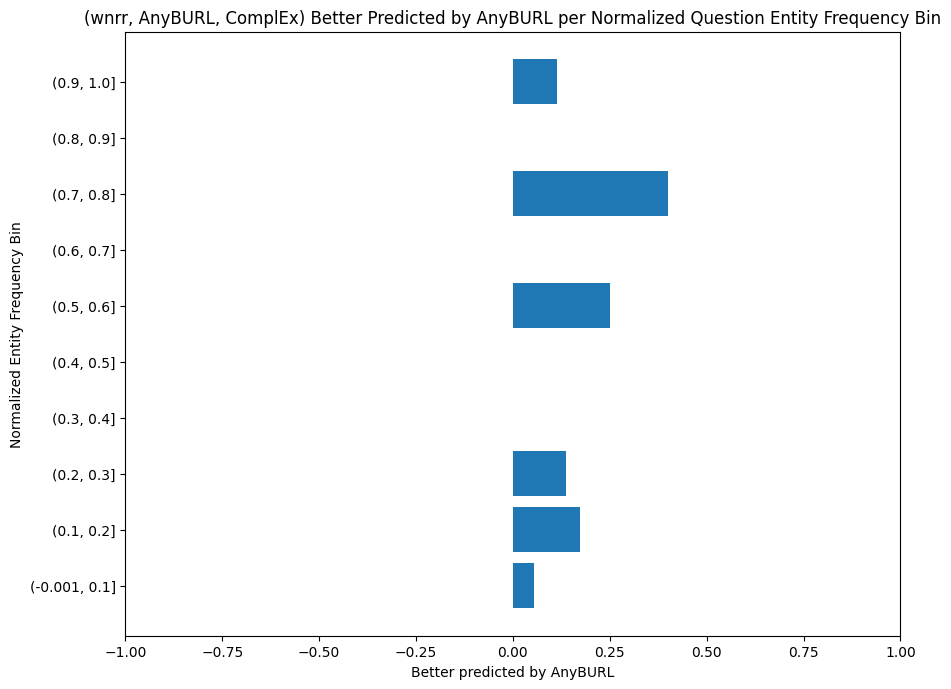

missing data to create an analysis for wnrr-AnyBURL-RESCAL
missing data to create an analysis for wnrr-AnyBURL-ConvE
Working on wn18 - AnyBURL - ComplEx
using precalculated values from temp\_get_entity_frequency_in_training_data-wn18.txt
using precalculated values from temp\_get_entity_frequency_in_training_data-wn18.txt


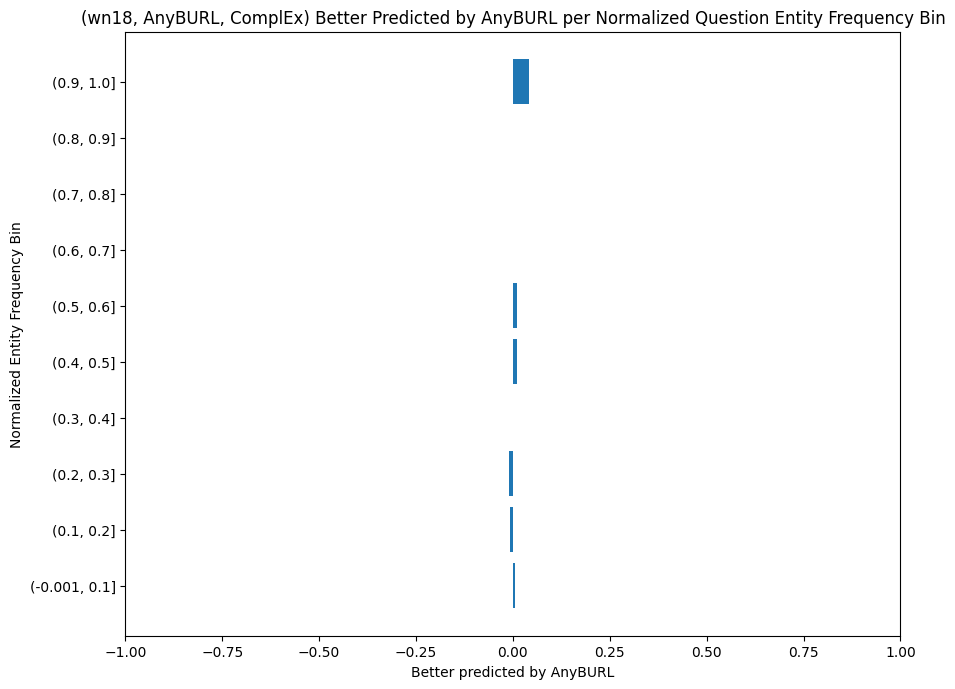

using precalculated values from temp\_get_entity_frequency_in_training_data-wn18.txt
using precalculated values from temp\_get_entity_frequency_in_training_data-wn18.txt


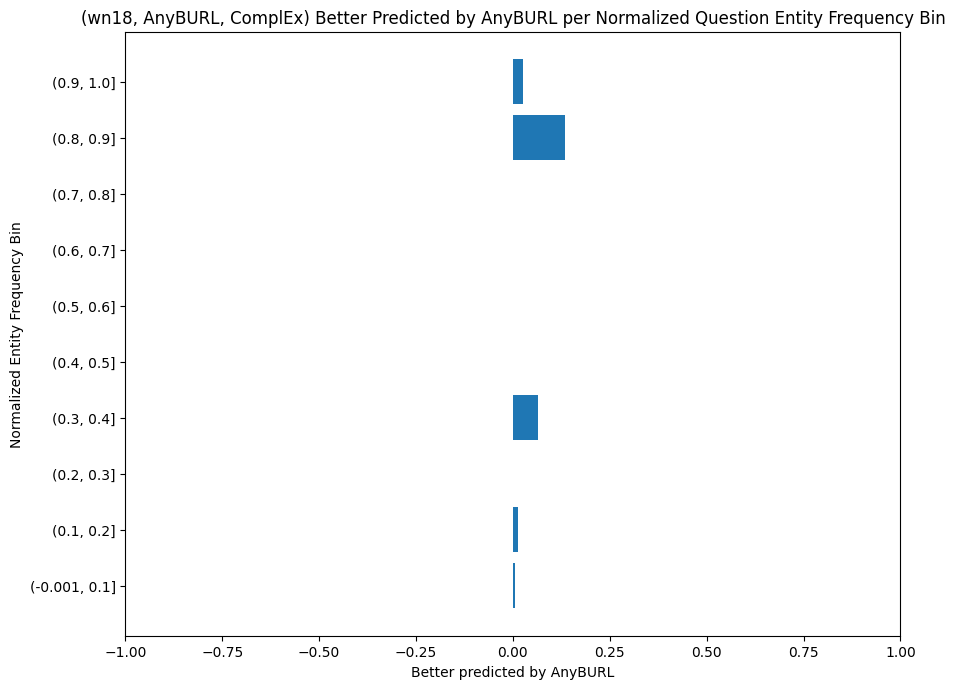

missing data to create an analysis for wn18-AnyBURL-RESCAL
missing data to create an analysis for wn18-AnyBURL-ConvE
Working on yago3-10 - AnyBURL - ComplEx
using precalculated values from temp\_get_entity_frequency_in_training_data-yago3-10.txt
using precalculated values from temp\_get_entity_frequency_in_training_data-yago3-10.txt


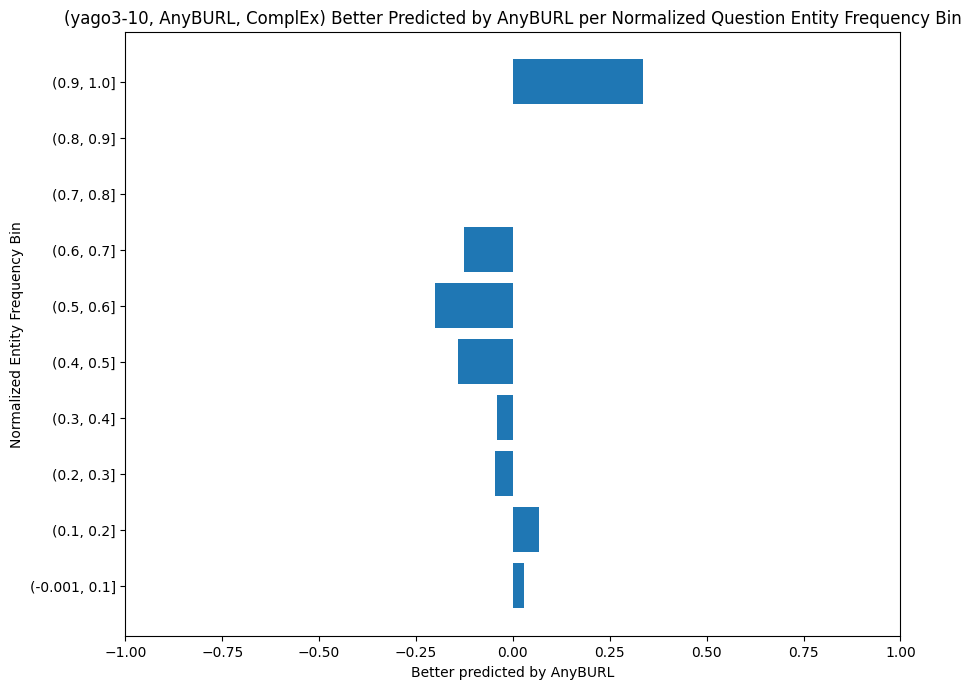

using precalculated values from temp\_get_entity_frequency_in_training_data-yago3-10.txt
using precalculated values from temp\_get_entity_frequency_in_training_data-yago3-10.txt


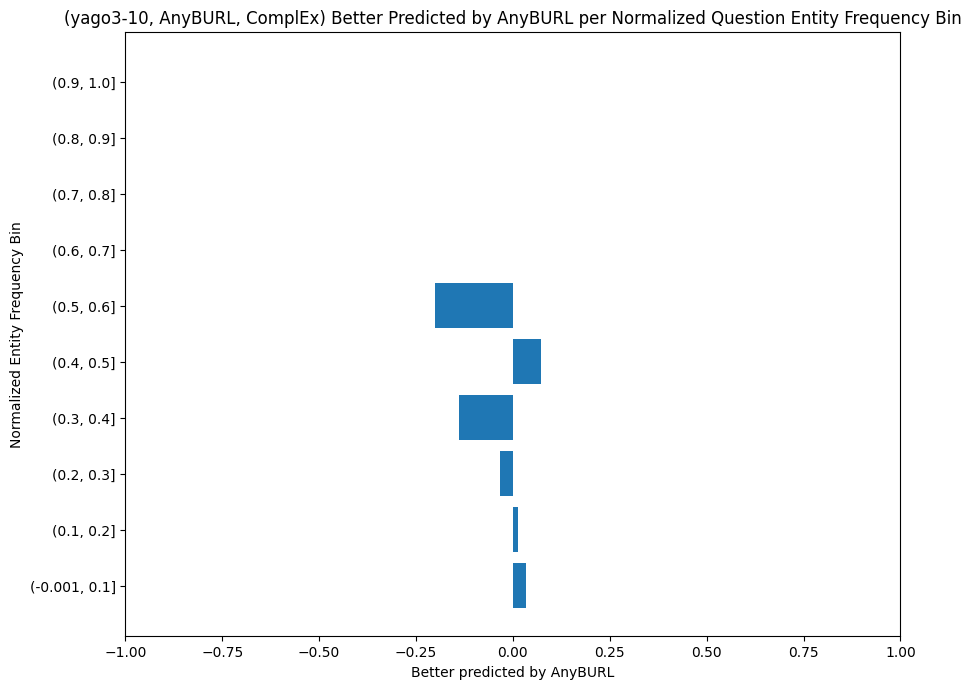

Working on yago3-10 - AnyBURL - RESCAL
using precalculated values from temp\_get_entity_frequency_in_training_data-yago3-10.txt
using precalculated values from temp\_get_entity_frequency_in_training_data-yago3-10.txt


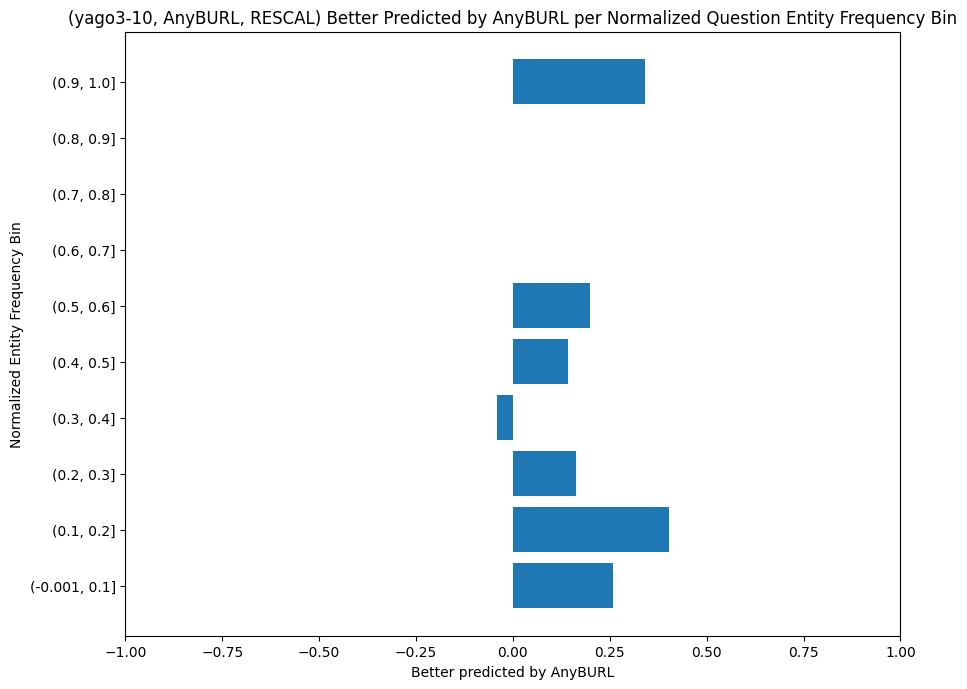

using precalculated values from temp\_get_entity_frequency_in_training_data-yago3-10.txt
using precalculated values from temp\_get_entity_frequency_in_training_data-yago3-10.txt


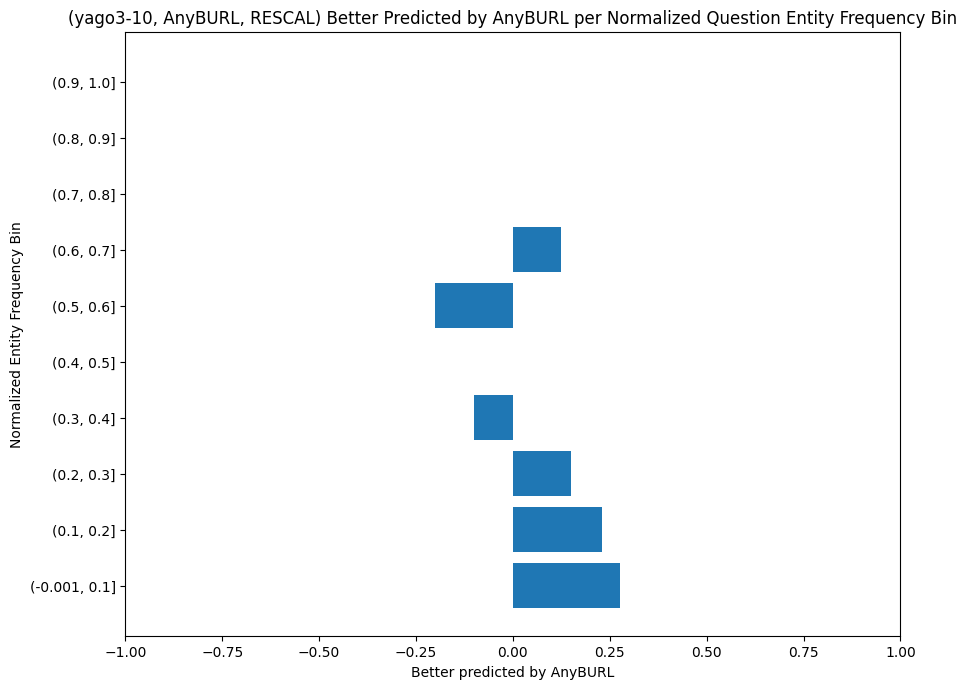

missing data to create an analysis for yago3-10-AnyBURL-ConvE


In [3]:
for dataset_name in datasets:
    for (symbolic, symbolic_name) in symbolic_models:
        for (subsymbolic, subsymbolic_name) in subsymbolic_models:
            if os.path.exists(os.path.join('experiments', f'{dataset_name}_{symbolic}')) and os.path.exists(os.path.join('experiments', f'{dataset_name}_{subsymbolic}_1')):
                print(f'Working on {dataset_name} - {symbolic_name} - {subsymbolic_name}')
                df = get_prediction_data(dataset_name, symbolic, subsymbolic)
                df = df[['h_id', 'r_id', 't_id', 'predicted_head', 'rank_filtered_anyburl', 'rank_filtered_kge', 'rank_filtered_kge_0', 'rank_filtered_kge_1', 'rank_filtered_kge_2', 'rank_filtered_kge_3', 'rank_filtered_kge_4', 'difference_psi']]
                df = df.dropna()
                pdf = PdfPages(os.path.join('analysis', f'analysis_for_{get_formatted_data_name(dataset_name, symbolic, subsymbolic)[0:-4]}.pdf'))
                show_all_graphs(df, dataset_name, use_difference_psi, bp_threshold)
                               
                pdf.close()
            else: 
                print(f'missing data to create an analysis for {dataset_name}-{symbolic_name}-{subsymbolic_name}')